In [50]:
import gym 
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [51]:
env = gym.make("FrozenLake-v0")

In [52]:
env.observation_space

Discrete(16)

In [53]:
action_space_size = env.action_space.n

In [54]:
state_space_size = env.observation_space.n

In [55]:
action_space_size, state_space_size

(4, 16)

### Initialization of the q values

In [56]:
q_table = np.zeros((state_space_size, action_space_size))

### Hyperparameters

In [57]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_eploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

### Training

In [58]:
rewards = []

for episode in range(num_episodes):
    state = env.reset()
    
    done = False
    reward_current_episode = 0
    
    for step in range(max_steps_per_episode):
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate: # greedy action (exploitation)
            action = np.argmax(q_table[state, :])
        else: # exploration action
            action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        # Update Q table 
        q_table[state, action] = q_table[state, action]  * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        
        state = new_state
        reward_current_episode += reward
        
        if done == True:
            break
            
    
    # Exploration rate decay 
    exploration_rate = min_exploration_rate + (max_eploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    
    rewards.append(reward_current_episode)

In [59]:
rewards_per_thousand_episodes = np.split(np.array(rewards),num_episodes/100)
count = 100
avg_return = []
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/100)))
    avg_return.append(sum(r/100))
    count += 100

********Average reward per thousand episodes********

100 :  0.02
200 :  0.02
300 :  0.0
400 :  0.03
500 :  0.02
600 :  0.05
700 :  0.11999999999999998
800 :  0.060000000000000005
900 :  0.11999999999999998
1000 :  0.11999999999999998
1100 :  0.12999999999999998
1200 :  0.11999999999999998
1300 :  0.24000000000000007
1400 :  0.18000000000000002
1500 :  0.17
1600 :  0.20000000000000004
1700 :  0.17
1800 :  0.25000000000000006
1900 :  0.24000000000000007
2000 :  0.24000000000000007
2100 :  0.37000000000000016
2200 :  0.38000000000000017
2300 :  0.3900000000000002
2400 :  0.4000000000000002
2500 :  0.3900000000000002
2600 :  0.45000000000000023
2700 :  0.47000000000000025
2800 :  0.3900000000000002
2900 :  0.5300000000000002
3000 :  0.4000000000000002
3100 :  0.48000000000000026
3200 :  0.4200000000000002
3300 :  0.5300000000000002
3400 :  0.5200000000000002
3500 :  0.5500000000000003
3600 :  0.6200000000000003
3700 :  0.5200000000000002
3800 :  0.6200000000000003
3900 :  0.62000000000000

In [60]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.50224727 0.50072338 0.49948772 0.50050852]
 [0.36295253 0.34817101 0.31947239 0.48053974]
 [0.39302759 0.42217635 0.41639261 0.46687175]
 [0.36659869 0.28900521 0.40109479 0.45873851]
 [0.52053598 0.28637621 0.41472341 0.40050721]
 [0.         0.         0.         0.        ]
 [0.2979846  0.18427481 0.19609335 0.10222897]
 [0.         0.         0.         0.        ]
 [0.44872576 0.39816352 0.30578769 0.54657459]
 [0.42739109 0.59025908 0.45547411 0.31405   ]
 [0.60963016 0.4134004  0.44263708 0.3359606 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.51005486 0.38463566 0.67588261 0.51517328]
 [0.72135877 0.81555563 0.81219784 0.75841193]
 [0.         0.         0.         0.        ]]


### Avg Return over 100 episodes

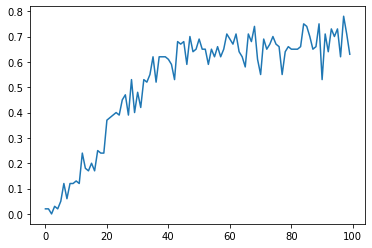

In [61]:
plt.plot(np.arange(len(avg_return)), avg_return);

### Prediction/Inference

In [64]:
for episode in range(3):
    state = env.reset()
    done = False
    print("***EEPISODE ", episode + 1, "*****\n\n\n\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q_table[state, :])
        new_state, reward, done, _ = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("***You reached the goal!!***")
                time.sleep(2)
            else:
                print("***You fell through a hole!!***")
                time.sleep(2)
            clear_output(wait=True)
            break
        state = new_state
env.close()

  (Left)
SFFF
FHFH
FFFH
HFFG
***You fell through a hole!!***
